In [78]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
bin_data = pd.read_csv('bin_data.csv')
bin_data.drop(bin_data.columns[0],axis=1,inplace=True)
multi_data = pd.read_csv('multi_data.csv')
multi_data.drop(multi_data.columns[0],axis=1,inplace=True)
le1_classes_ = np.load('le1_classes.npy',allow_pickle=True)
le2_classes_ = np.load('le2_classes.npy',allow_pickle=True)

# **Linear Support Vector Machine Classifier (Binary Classification)**

In [80]:
# importing library for support vector machine classifier
from sklearn.svm import SVC

In [81]:
X = bin_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['intrusion'] # target attribute

In [82]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [83]:
# using kernel as linear 
lsvm = SVC(kernel='linear',gamma='auto') 
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [84]:
pkl_filename = "lsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loaded model from disk") 

In [85]:
y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  96.69778370483266


In [86]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.97      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



# **Quadratic Support Vector Machine Classifier (Binary Classification)**

In [87]:
qsvm=SVC(kernel='poly',gamma='auto') # using kernal as polynomial for quadratic svm
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [88]:
pkl_filename = "qsvm_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk 
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [89]:
y_pred=qsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("QSVM-Classifier Binary Set-Accuracy is ", ac)

QSVM-Classifier Binary Set-Accuracy is  95.71029402425859


In [90]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.92      0.95     14720
      normal       0.93      0.99      0.96     16774

    accuracy                           0.96     31494
   macro avg       0.96      0.95      0.96     31494
weighted avg       0.96      0.96      0.96     31494



# **K-nearest-neighbor Classifier (Binary Classification)**

In [91]:
# importing library for K-neares-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier

In [92]:
knn=KNeighborsClassifier(n_neighbors=5) # creating model for 5 neighbors
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [93]:
pkl_filename = "knn_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving the trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading the trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

In [94]:
y_pred=knn.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("KNN-Classifier Binary Set-Accuracy is ", ac)

KNN-Classifier Binary Set-Accuracy is  98.55845557884041


In [95]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.99      0.98      0.98     14720
      normal       0.99      0.99      0.99     16774

    accuracy                           0.99     31494
   macro avg       0.99      0.99      0.99     31494
weighted avg       0.99      0.99      0.99     31494



# **Linear Discriminant Analysis Classifier (Binary Classification)**

In [96]:
# importing library for Linear Discriminant Analysis Model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [97]:
lda = LinearDiscriminantAnalysis() 
lda.fit(X_train, y_train)  # training model on training dataset

LinearDiscriminantAnalysis()

In [98]:
pkl_filename = "lda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")

In [99]:
y_pred = lda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  96.70730932876104


In [100]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       0.97      0.96      0.96     14720
      normal       0.96      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



# **Quadratic Discriminant Analysis Classifier (Binary Classification)**

In [101]:
# importing library for Quadratic Discriminant Analysis Model
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [102]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [103]:
pkl_filename = "qda_binary.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [104]:
y_pred = qda.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Set-Accuracy is ", ac)

QDA-Classifier Set-Accuracy is  68.53051374865053


In [105]:
# classification report
print(classification_report(y_test, y_pred,target_names=le1_classes_))

              precision    recall  f1-score   support

    abnormal       1.00      0.33      0.49     14720
      normal       0.63      1.00      0.77     16774

    accuracy                           0.69     31494
   macro avg       0.81      0.66      0.63     31494
weighted avg       0.80      0.69      0.64     31494



# **Multi Layer Perceptron Classifier (Binary Classification)**

In [106]:
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

In [107]:
X = bin_data.iloc[:,0:93].values # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [108]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [109]:
mlp = Sequential() # creating model

# adding input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with sigmoid activation
mlp.add(Dense(units=1,activation='sigmoid'))

C:\Users\tarun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [111]:
# summary of model layers
mlp.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 50)                  │           4,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,751 (18.56 KB)

 Trainable params: 4,751 (18.56 KB)

 Non-trainable params: 0 (0.00 B)

In [112]:
# training the model on training dataset
X_train = np.float32(X_train)
y_train = np.float32(y_train)
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.4918 - loss: 0.6918 - val_accuracy: 0.8421 - val_loss: 0.5138
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8589 - loss: 0.4712 - val_accuracy: 0.9009 - val_loss: 0.3566
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9038 - loss: 0.3314 - val_accuracy: 0.9171 - val_loss: 0.2699
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9163 - loss: 0.2568 - val_accuracy: 0.9256 - val_loss: 0.2223
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9225 - loss: 0.2161 - val_accuracy: 0.9372 - val_loss: 0.1921
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9390 - loss: 0.1862 - val_accuracy: 0.9517 - val_loss: 0.1712
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9529 - loss: 0.1654 - val_accuracy: 0.9602 - val_loss: 0.1561
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9601 - loss: 0.1539 - val_accuracy: 0.9650 - 

In [113]:
filepath = 'mlp_binary.json'
weightspath = 'mlp_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [114]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
# predicting target attribute on testing dataset

X_test = np.float32(X_test)
y_test = np.float32(y_test)
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.9763 - loss: 0.0689
Test results - Loss: 0.06580944359302521 - Accuracy: 97.75195121765137


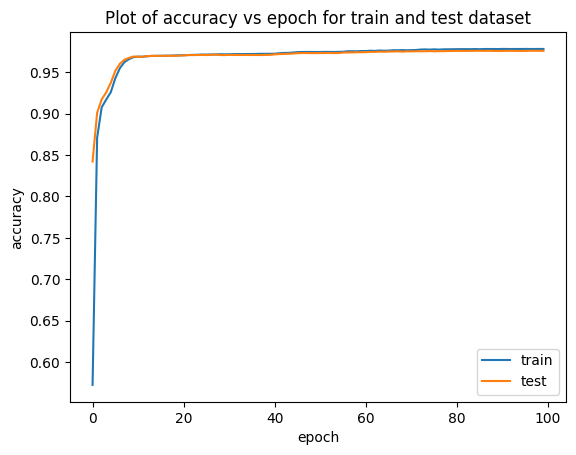

In [116]:
# Plot of accuracy vs epoch of train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('mlp_binary_accuracy.png')
plt.show()

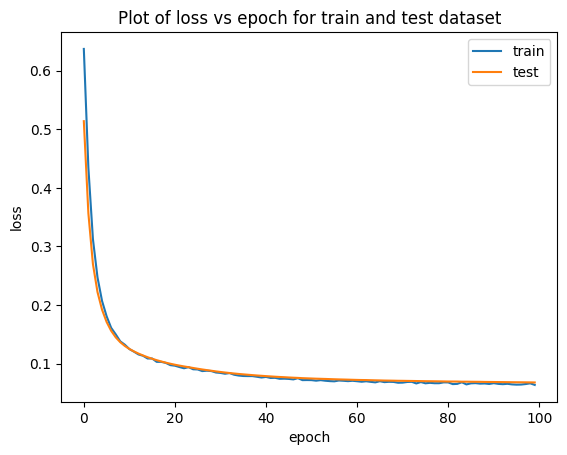

In [117]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of loss vs epoch for train and test dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('mlp_binary_loss.png')
plt.show()

In [118]:
# representation of model layers
from keras.utils import plot_model
plot_model(mlp, to_file='mlp_binary.png', show_shapes=True,)

You must install pydot (`pip install pydot`) for `plot_model` to work.


# **Long Short-Term Memory Classifier (Binary Classification)**

In [119]:
# importing library for LSTM layers
from keras.layers import LSTM

In [120]:
X = bin_data.iloc[:,0:93] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data[['intrusion']].values # target attribute

In [121]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [122]:
X_train = X_train.to_numpy()

In [123]:
x_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [124]:
lst = Sequential() # initializing model

# input layer and LSTM layer with 50 neurons
lst.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
# outpute layer with sigmoid activation
lst.add(Dense(1, activation='sigmoid'))

C:\Users\tarun\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [125]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [126]:
# summary of model layers
lst.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 93, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 93, 1)               │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [127]:
# training the model on training dataset
import tensorflow as tf

# Ensure x_train and y_train are NumPy arrays
x_train = np.array(x_train)
y_train = np.array(y_train)

# Convert data types if necessary (optional)
x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)

# Check the shapes of x_train and y_train
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

# Define and compile your model (assuming `lst` is your model)
lst.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

x_train shape: (94479, 93, 1)
y_train shape: (94479, 1)
Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - loss: 0.2493 - mae: 0.4991 - val_loss: 0.2476 - val_mae: 0.4954
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.2463 - mae: 0.4937 - val_loss: 0.1996 - val_mae: 0.4106
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 0.1744 - mae: 0.3661 - val_loss: 0.1420 - val_mae: 0.2766
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 0.1414 - mae: 0.2745 - val_loss: 0.1352 - val_mae: 0.2727
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 0.1367 - mae: 0.2758 - val_loss: 0.1339 - val_mae: 0.2709
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 0.1353 - mae: 0.2707 - val_loss: 0.1328 - val_mae: 0.2671
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.1345 - mae: 0.2705 - val_loss: 0.1323 - val_mae: 0.2653
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - loss: 0.1335 - mae: 0.2655 - val_loss: 0.1315 - val_mae: 0.2652
Epoch 9/

In [128]:
x_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [251]:
filepath = 'lst_binary.json'
weightspath = 'lst_binary.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  lst_json = lst.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(lst_json)

  # serialize weights to HDF5
  lst.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

In [250]:
# defining loss function, optimizer, metrics and then compiling model
lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [260]:
# Create a Sequential model
lst = Sequential()

# Add an LSTM layer with 50 neurons (assuming input_shape is (timesteps, features))
lst.add(LSTM(50, input_shape=(x_train.shape[1], x_train.shape[2])))

# Add an output layer with sigmoid activation
lst.add(Dense(1, activation='sigmoid'))  # Adjust the output dimension if needed

# Compile the model
lst.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Keys 'accuracy' and 'val_accuracy' not found in the history dictionary.


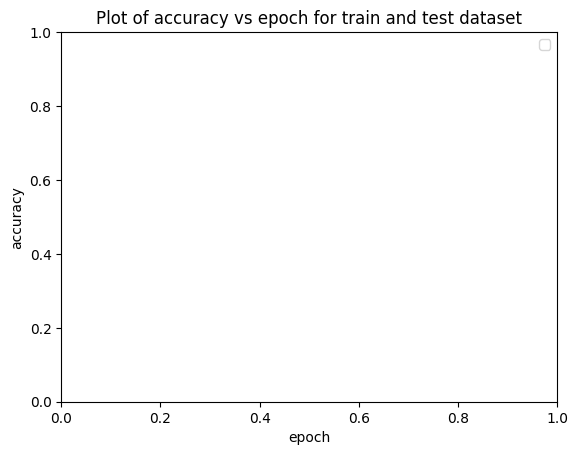

In [262]:
# Check if 'history' is a dictionary
if isinstance(history, dict):
    # Plot accuracy vs epoch directly from the dictionary if available
    if 'accuracy' in history and 'val_accuracy' in history:
        plt.plot(history['accuracy'])
        plt.plot(history['val_accuracy'])
    else:
        print("Keys 'accuracy' and 'val_accuracy' not found in the history dictionary.")
else:
    # Assume 'history' is a History object from Keras
    if 'accuracy' in history.history and 'val_accuracy' in history.history:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
    else:
        print("Keys 'accuracy' and 'val_accuracy' not found in the history attribute of the History object.")

# Add title, labels, and legend
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# Save and show the plot
plt.savefig('lstm_binary_accuracy.png')
plt.show()


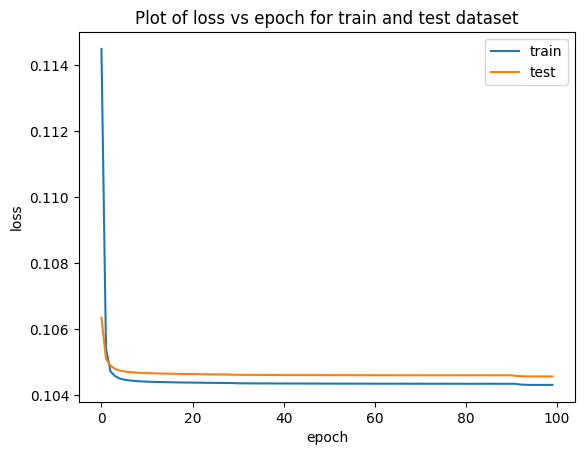

In [264]:
# Check if 'history' is a dictionary
if isinstance(history, dict):
    # Plot loss vs epoch directly from the dictionary if available
    if 'loss' in history and 'val_loss' in history:
        plt.plot(history['loss'])
        plt.plot(history['val_loss'])
    else:
        print("Keys 'loss' and 'val_loss' not found in the history dictionary.")
else:
    # Assume 'history' is a History object from Keras
    if 'loss' in history.history and 'val_loss' in history.history:
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
    else:
        print("Keys 'loss' and 'val_loss' not found in the history attribute of the History object.")

# Add title, labels, and legend
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

# Save and show the plot
plt.savefig('lstm_binary_loss.png')
plt.show()


In [224]:
# representation of model layers
plot_model(lst, to_file='lstm_binary.png', show_shapes=True,)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [225]:
pip install pydot

# **Auto Encoder Classifier (Binary Classification)**

In [226]:
from keras.layers import Input
from keras.models import Model

In [227]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [228]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','abnormal','normal','label'],axis=1) 

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','abnormal','normal','label'],axis=1)

In [229]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [230]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [231]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [232]:
# summary of model layers
autoencoder.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 93)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 50)                  │           4,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 93)                  │           4,743 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,443 (36.89 KB)

 Trainable params: 9,443 (36.89 KB)

 Non-trainable params: 0 (0.00 B)

In [233]:
# training the model on training dataset
import numpy as np

# Ensure data types are float32
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Check the shapes of input data
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# Verify the data type
print("Data type of X_train:", X_train.dtype)
print("Data type of X_test:", X_test.dtype)

# Ensure that the autoencoder model is compiled before training
autoencoder.compile(optimizer='adam', loss='mse')

# Train the model
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=500, validation_data=(X_test, X_test)).history

# history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

X_train shape: (94479, 93)
X_test shape: (31494, 93)
Data type of X_train: float32
Data type of X_test: float32
Epoch 1/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1218 - val_loss: 0.1063
Epoch 2/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1055 - val_loss: 0.1051
Epoch 3/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1046 - val_loss: 0.1049
Epoch 4/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1046 - val_loss: 0.1048
Epoch 5/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1045 - val_loss: 0.1047
Epoch 6/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1046 - val_loss: 0.1047
Epoch 7/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1044 - val_loss: 0.1047
Epoch 8/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1045 - val_loss: 0.1047
Epoch 9/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1044 - val_loss: 0.1047
Epoch 10/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1041 - val_loss: 0.1047
Epoch 11/100
189/

In [235]:
filepath = 'ae_binary.json'
weightspath = 'ae_binary.h5'
if (not path.isfile(filepath)): 
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

In [236]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [237]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 838us/step - accuracy: 0.9056 - loss: 0.1044
Test results - Loss: 0.10456223785877228 - Accuracy: 0.9089667797088623%


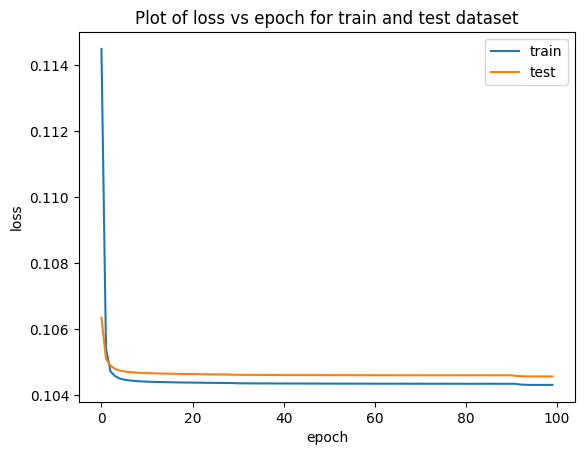

In [238]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('ae_binary_loss.png')
plt.show()

In [240]:
# Plot of accuracy vs epoch of train and test dataset
# plt.plot(history['accuracy'])
# plt.plot(history['val_accuracy'])
# plt.title("Plot of accuracy vs epoch for train and test dataset")
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='best')
# plt.savefig('ae_binary_accuracy.png')
# plt.show()
print(history.keys())


dict_keys(['loss', 'val_loss'])


In [241]:
# representation of model layers
plot_model(autoencoder, to_file='ae_binary.png', show_shapes=True,)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [242]:
# calculating reconstruction error 
predictions = autoencoder.predict(X_test)

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [243]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [244]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104570,0.532609
std,0.043572,0.498943
min,0.040637,0.000000
25%,0.074499,0.000000
50%,0.083821,1.000000
75%,0.151405,1.000000
max,0.229789,1.000000


# **Linear Support Vector Machine Classifier (Multi-class Classification)**

In [245]:
X = multi_data.iloc[:,0:93].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded, original)
Y = multi_data['intrusion'] # target attribute

In [246]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [247]:
lsvm=SVC(kernel='linear',gamma='auto')
lsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='linear')

In [168]:
# saving trained model to disk
pkl_filename = "lsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lsvm = pickle.load(file)
  print("Loade model from disk")
  

In [169]:
y_pred=lsvm.predict(X_test) # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LSVM-Classifier Multi-class Set-Accuracy is ", ac)

LSVM-Classifier Multi-class Set-Accuracy is  95.24988886772083


In [170]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.95      0.96      0.96     11484
       Probe       0.86      0.79      0.82      2947
         R2L       0.61      0.60      0.61       274
         U2R       0.00      0.00      0.00        15
      normal       0.97      0.98      0.98     16774

    accuracy                           0.95     31494
   macro avg       0.68      0.67      0.67     31494
weighted avg       0.95      0.95      0.95     31494



C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Quadratic Support Vector Machine Classifier (Multi-class Classification)**

In [171]:
qsvm=SVC(kernel='poly',gamma='auto')
qsvm.fit(X_train,y_train) # training model on training dataset

SVC(gamma='auto', kernel='poly')

In [172]:
pkl_filename = "qsvm_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qsvm, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qsvm = pickle.load(file)
  print("Loaded model from disk")

In [175]:
y_pred=qsvm.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QSVM-Classifier Multi-class Set-Accuracy is ", ac)

QSVM-Classifier Multi-class Set-Accuracy is  92.86213246967677


In [176]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.96      0.94      0.95     11484
       Probe       0.96      0.61      0.74      2947
         R2L       0.00      0.00      0.00       274
         U2R       0.00      0.00      0.00        15
      normal       0.91      1.00      0.95     16774

    accuracy                           0.93     31494
   macro avg       0.56      0.51      0.53     31494
weighted avg       0.92      0.93      0.92     31494



C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **K-nearest-neighbor Classifier (Multi-class Classification)**

In [177]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train) # training model on training dataset

KNeighborsClassifier()

In [178]:
pkl_filename = "knn_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(knn, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    knn = pickle.load(file)
  print("Loaded model from disk")

In [179]:
y_pred=knn.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("KNN-Classifier Multi-class Set-Accuracy is ", ac)

KNN-Classifier Multi-class Set-Accuracy is  98.29173810884613


In [180]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.99      0.99     11484
       Probe       0.96      0.96      0.96      2947
         R2L       0.90      0.87      0.88       274
         U2R       0.40      0.13      0.20        15
      normal       0.99      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.85      0.79      0.80     31494
weighted avg       0.98      0.98      0.98     31494



# **Linear Discriminant Analysis Classifier (Multi-class Classification)**

In [181]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # training model on training dataset

LinearDiscriminantAnalysis()

In [182]:
pkl_filename = "lda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(lda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    lda = pickle.load(file)
  print("Loaded model from disk")
  

In [183]:
y_pred = lda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("LDA-Classifier Set-Accuracy is ", ac)

LDA-Classifier Set-Accuracy is  93.1923540991935


In [184]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.94      0.96      0.95     11484
       Probe       0.88      0.73      0.80      2947
         R2L       0.37      0.89      0.52       274
         U2R       0.03      0.47      0.06        15
      normal       0.97      0.95      0.96     16774

    accuracy                           0.93     31494
   macro avg       0.64      0.80      0.66     31494
weighted avg       0.94      0.93      0.94     31494



# **Quadratic Discriminant Analysis Classifier (Multi-class Classification)**

In [185]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train) # training model on training dataset

C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis()

In [186]:
pkl_filename = "qda_multi.pkl"
if (not path.isfile(pkl_filename)):
  # saving trained model to disk
  with open(pkl_filename, 'wb') as file:
    pickle.dump(qda, file)
  print("Saved model to disk")
  # loading trained model from disk
  with open(pkl_filename, 'rb') as file:
    qda = pickle.load(file)
  print("Loaded model from disk")

In [187]:
y_pred = qda.predict(X_test)  # predicting target attribute on testing dataset
ac=accuracy_score(y_test, y_pred)*100  # calculating accuracy of predicted data
print("QDA-Classifier Multi-class Set-Accuracy is ", ac)

QDA-Classifier Multi-class Set-Accuracy is  43.49717406490125


In [188]:
# classification report
print(classification_report(y_test, y_pred,target_names=le2_classes_))

              precision    recall  f1-score   support

         Dos       0.99      0.42      0.59     11484
       Probe       0.97      0.06      0.11      2947
         R2L       0.03      1.00      0.06       274
         U2R       0.00      0.00      0.00        15
      normal       0.48      0.50      0.49     16774

    accuracy                           0.43     31494
   macro avg       0.49      0.40      0.25     31494
weighted avg       0.71      0.43      0.49     31494



C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\tarun\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Multi Layer Perceptron Classifier (Multi-class Classification)**

In [189]:
X = multi_data.iloc[:,0:93]  # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = multi_data[['Dos','normal','Probe','R2L','U2R']] # target attributes

In [190]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

In [191]:
mlp = Sequential() # initializing model
# input layer and first layer with 50 neurons
mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
# output layer with softmax activation
mlp.add(Dense(units=5,activation='softmax'))

C:\Users\tarun\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [192]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [193]:
# summary of model layers
mlp.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 50)                  │           4,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,955 (19.36 KB)

 Trainable params: 4,955 (19.36 KB)

 Non-trainable params: 0 (0.00 B)

In [197]:
# training the model on training dataset
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)



Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5288 - loss: 1.4290 - val_accuracy: 0.8322 - val_loss: 1.0385
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8395 - loss: 0.9374 - val_accuracy: 0.8643 - val_loss: 0.6813
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8621 - loss: 0.6285 - val_accuracy: 0.8677 - val_loss: 0.4959
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8754 - loss: 0.4657 - val_accuracy: 0.8843 - val_loss: 0.3975
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8861 - loss: 0.3767 - val_accuracy: 0.9090 - val_loss: 0.3413
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9124 - loss: 0.3295 - val_accuracy: 0.9227 - val_loss: 0.3049
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9235 - loss: 0.2931 - val_accuracy: 0.9273 - val_loss: 0.2786
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9295 - loss: 0.2662 - val_accuracy: 0.9319 - 

In [198]:
filepath = 'mlp_multi.json'
weightspath = 'mlp_multi.h5'
if (not path.isfile(filepath)):
  # serialize model to JSON
  mlp_json = mlp.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(mlp_json)

  # serialize weights to HDF5
  mlp.save_weights(weightspath)
  print("Saved model to disk")
  
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  mlp = model_from_json(loaded_model_json)

  # load weights into new model
  mlp.load_weights(weightspath)
  print("Loaded model from disk")

In [199]:
# defining loss function, optimizer, metrics and then compiling model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [201]:
# predicting target attribute on testing dataset
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)
test_results = mlp.evaluate(X_test, y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 914us/step - accuracy: 0.9679 - loss: 0.0948
Test results - Loss: 0.09042131155729294 - Accuracy: 96.9613254070282%


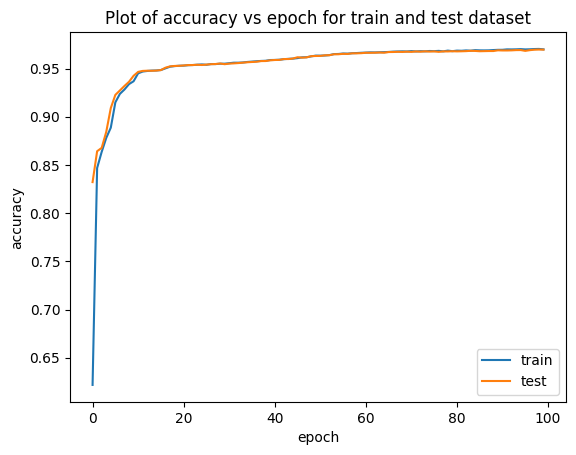

In [202]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('mlp_multi_accuracy.png')
plt.show()

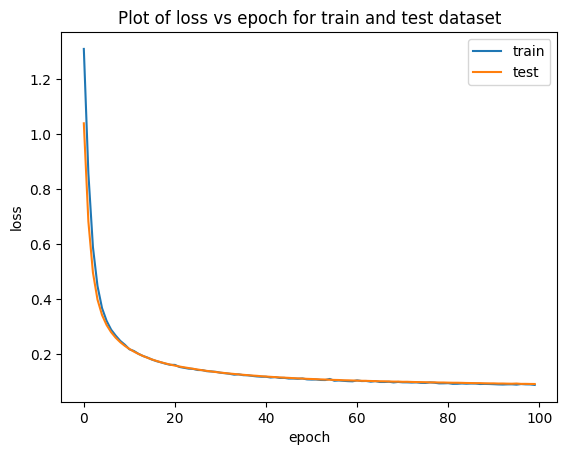

In [203]:
# Plot of loss vs epoch for train and test dataset
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('mlp_multi_loss.png')
plt.show()

In [204]:
# representation of model layers
plot_model(mlp, to_file='mlp_multi.png', show_shapes=True,)

You must install pydot (`pip install pydot`) for `plot_model` to work.


# **Auto Encoder Classifier (Multi-class Classification)**

In [205]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test = train_test_split(multi_data, test_size=0.25, random_state=42)

In [206]:
# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_train = X_train.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

y_test = X_test['intrusion'] # target attribute

# dataset excluding target attribute (encoded, one-hot-encoded,original)
X_test = X_test.drop(['intrusion','Dos','normal','Probe','R2L','U2R','label'],axis=1)

In [207]:
X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

In [208]:
input_dim = X_train.shape[1]
encoding_dim = 50

#input layer
input_layer = Input(shape=(input_dim, ))
#encoding layer with 50 neurons
encoder = Dense(encoding_dim, activation="relu")(input_layer)           
#decoding and output layer
output_layer = Dense(input_dim, activation='softmax')(encoder)

In [209]:
# creating model with input, encoding, decoding, output layers
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [210]:
# summary of model layers
autoencoder.summary()

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 93)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 50)                  │           4,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 93)                  │           4,743 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,443 (36.89 KB)

 Trainable params: 9,443 (36.89 KB)

 Non-trainable params: 0 (0.00 B)

In [214]:
# training the model on training dataset
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4833 - loss: 0.1054 - val_accuracy: 0.6997 - val_loss: 0.1052
Epoch 2/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6951 - loss: 0.1048 - val_accuracy: 0.7297 - val_loss: 0.1049
Epoch 3/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7243 - loss: 0.1043 - val_accuracy: 0.7979 - val_loss: 0.1048
Epoch 4/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7873 - loss: 0.1045 - val_accuracy: 0.8110 - val_loss: 0.1047
Epoch 5/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8202 - loss: 0.1046 - val_accuracy: 0.8524 - val_loss: 0.1047
Epoch 6/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8332 - loss: 0.1046 - val_accuracy: 0.8569 - val_loss: 0.1047
Epoch 7/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8453 - loss: 0.1045 - val_accuracy: 0.8202 - val_loss: 0.1047
Epoch 8/100
189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8432 - loss: 0.1042 - val_accu

In [215]:
filepath = 'ae_multi.json'
weightspath = 'ae_multi.h5'
if (not path.isfile(filepath)):  
  # serialize model to JSON
  autoencoder_json = autoencoder.to_json()
  with open(filepath, "w") as json_file:
    json_file.write(autoencoder_json)

  # serialize weights to HDF5
  autoencoder.save_weights(weightspath)
  print("Saved model to disk")

  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  autoencoder = model_from_json(loaded_model_json)

  # load weights into new model
  autoencoder.load_weights(weightspath)
  print("Loaded model from disk")

In [216]:
# defining loss function, optimizer, metrics and then compiling model
autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [217]:
# predicting target attribute on testing dataset
test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8721 - loss: 0.1044
Test results - Loss: 0.10456135123968124 - Accuracy: 87.38489747047424%


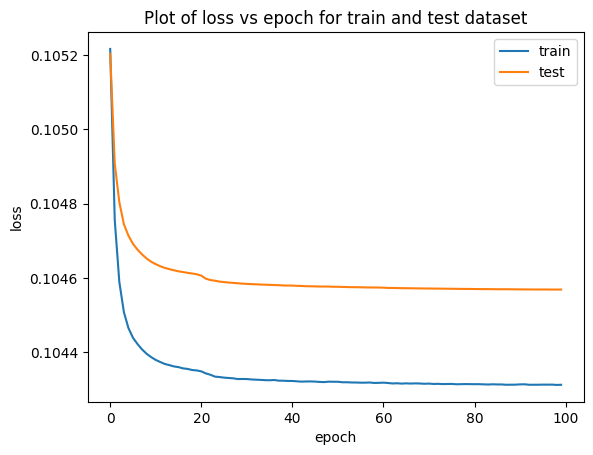

In [218]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.savefig('ae_multi_loss.png')
plt.show()

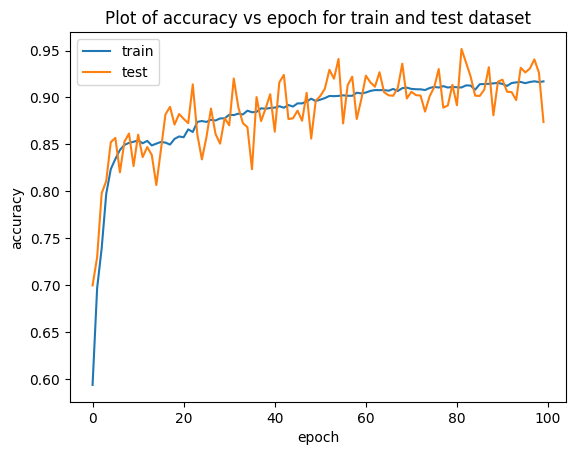

In [219]:
# Plot of loss vs epoch of train and test dataset
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('ae_multi_accuracy.png')
plt.show()

In [220]:
# representation of model layers
plot_model(autoencoder, to_file='ae_multi.png', show_shapes=True,)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [221]:
# calculating reconstruction error
predictions = autoencoder.predict(X_test)

985/985 ━━━━━━━━━━━━━━━━━━━━ 1s 954us/step


In [222]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})

In [223]:
error_df.describe()

,reconstruction_error,true_class
count,31494.000000,31494.000000
mean,0.104569,2.242840
std,0.043573,1.903732
min,0.040622,0.000000
25%,0.074501,0.000000
50%,0.083821,4.000000
75%,0.151405,4.000000
max,0.229790,4.000000
